<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NguyenToanQuan
#Test1

In [ ]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
folder='/content/drive/MyDrive/AI_Homwork/Hand'
photos,labels=list(),list()

In [ ]:
for file in listdir(folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('M'):
       output=1
     if file.startswith('Nhat'):
       output=2
     if file.startswith('Thuyen'):
       output=3
     if file.startswith('Quynhan'):
       output=4
     if file.startswith('X'):
       output=5
     photo=load_img(folder+'/'+file,target_size=(50,50))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('hand_photos.npy',photos)
save('hand_labels.npy',labels)

import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
   
classes=5

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(50,50,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

batch_size=32
epochs=30

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

(5, 50, 50, 3) (5,)
X_train: (4, 50, 50, 3)
X_test: (1, 50, 50, 3)
y_train: (4, 5)
y_test: (1, 5)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_4 (MaxP

In [ ]:
model.save("/content/drive/MyDrive/AI_Homwork/Hand")

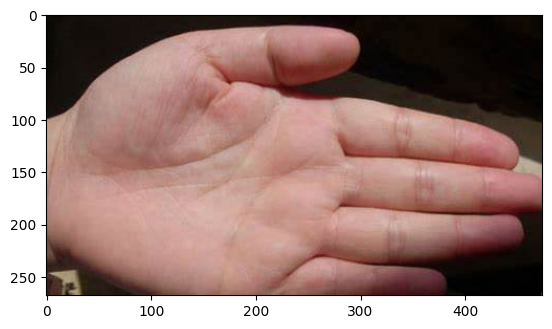

In [ ]:
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model("/content/drive/MyDrive/AI_Homwork/Hand")
img=load_img('/content/drive/MyDrive/AI_Homwork/Hand/M.jpg')
plt.imshow(img)
plt.show()

In [ ]:
import cv2

class_name = ['Hình chữ M','Hình chữ Nhất','Hình con thuyền','Quý nhân phù trợ','Hình chữ X']

labels = {
    "Hình chữ M": "Người sở hữu đường chỉ tay chữ M thường xuyên gặp may mắn và rất giàu có. Mọi việc đến với người sở hữu chỉ tay này đều suôn sẻ và thuận lợi, họ cũng luôn biết cách tận dụng để phát triển sự nghiệp trở nên rực rỡ, xuất sắc và đạt được thành công vang dội..",
    "Hình chữ Nhất": "Họ thường đạt được nhiều thành công trong sự nghiệp, và tất nhiên, tương lai của của những người này rất xán lạn, giàu sang phú quý hơn người. Có người lên được vị trí cao như tổng thống và nhà quân sự tài ba..",
    "Hình con thuyền": "Những năm tháng đầu đời của người có đường chỉ tay hình thỏi vàng có thể gặp đôi chút sóng gió nhưng tất cả những vất vả đó sẽ chấm hết khi họ bước vào giai đoạn trung vận.",
    "Quý nhân phù trợ": "Trong cuộc đời, để gặp được quý nhân không phải là dễ. Nhưng đối với người ở hữu đường chỉ tay đặc biệt thì lại rất dễ gặp. Dường như quý nhân luôn ở quanh người sở hữu đường chỉ tay quý nhân.  ",
    "Hình chữ X": "Sinh ra đã mang trong mình vận mệnh giàu sang, phú quý hơn người, được người đời kính trọng. Con đường sự nghiệp của người có đường chỉ tay hình chữ X vô cùng tươi sáng và tốt lành.Đường tình duyên đến khá muộn, dù là nam hay nữ, nếu sở hữu đường chỉ tay chữ X trong lòng bàn tay luôn là người chồng/vợ mẫu mực của gia đình.  ."
}
 
img = cv2.imread('/content/drive/MyDrive/AI_Homwork/Hand/Nhat.jpg')
img = cv2.resize(img, (50, 50))

img = img.reshape(1, 50, 50, 3)
img = img.astype('float32')
img = img/255

predict = model.predict(img)

predicted_label = class_name[np.argmax(predict[0])]
predicted_probability = np.max(predict[0])

print("Đây là đường chỉ tay ", predicted_label)
print("Dự đoán vận mệnh :", labels[predicted_label])

1/1 [==============================] - 1s 530ms/step
Đây là đường chỉ tay  Hình chữ Nhất
Dự đoán vận mệnh : Họ thường đạt được nhiều thành công trong sự nghiệp, và tất nhiên, tương lai của của những người này rất xán lạn, giàu sang phú quý hơn người. Có người lên được vị trí cao như tổng thống và nhà quân sự tài ba..


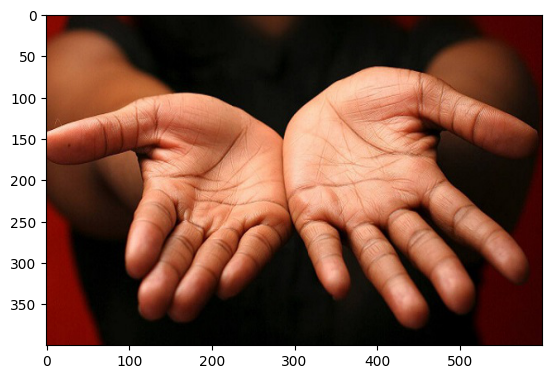

1/1 [==============================] - 0s 41ms/step
Đây là đường chỉ tay  Hình chữ X
Dự đoán vận mệnh : Sinh ra đã mang trong mình vận mệnh giàu sang, phú quý hơn người, được người đời kính trọng. Con đường sự nghiệp của người có đường chỉ tay hình chữ X vô cùng tươi sáng và tốt lành.Đường tình duyên đến khá muộn, dù là nam hay nữ, nếu sở hữu đường chỉ tay chữ X trong lòng bàn tay luôn là người chồng/vợ mẫu mực của gia đình.  .


In [ ]:
# test

img1=load_img('/content/drive/MyDrive/AI_Homwork/Hand/X.jpg')
plt.imshow(img1)
plt.show()



img1 = cv2.imread('/content/drive/MyDrive/AI_Homwork/Hand/X.jpg')
img1 = cv2.resize(img1, (50, 50))

img1 = img1.reshape(1, 50, 50, 3)
img1 = img1.astype('float32')
img1 = img1/255

predict = model.predict(img1)

predicted_label = class_name[np.argmax(predict[0])]
predicted_probability = np.max(predict[0])

print("Đây là đường chỉ tay ", predicted_label)
print("Dự đoán vận mệnh :", labels[predicted_label])